# SCC-ICMC-USP - 2o. semestre de 2025
# SCC0275 - Introdução a Ciencia de Dados
# **PROVA 1 - 13/10/2025**
### **Profa. Roseli A. F. Romero**


Nro do grupo:

Alunos:


1.   Pedro Guilherme de Barros Zenatte - 13676919
2.   List item
---

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
# Celula de importacoes mais utilizadas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import gaussian_kde
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew, kurtosis

---
### Questão 1. (valor 2.5)

Considere a base de dados sobre informações de apartamentos: aptos.csv e faça a sua leitura.

a) Verifique quantos valores faltantes existem no atributo: **area** e realize a imputação desses valores considerando a média da área de apartamentos que possuem 2 dormitórios.

b) Transforme adequadamente os dados categóricos.

c) Padronizar os dados referentes ao valor do apto **valor_R$**

d) Verifique se existem "outliers" no atributo **valor_R$**

e) Verifique o tipo de relação linear que existe entre os atributos: conservação, idade_real, dormitório e valor_R$ e comente os resultados obtidos.

In [61]:
# Primeiro, faremos a leitura do arquivo excel

# Carregar arquivo Excel
dados = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/P1/base-dados-p1-scc0275-APARTAMENTOS_modificado.xlsx")

# Exibir as cinco primeiras linhas
display(dados.head())

,apto,pos.apto.,elevador,garagem,local.,area,pavimento,andar,pecas,salas,...,dist.emp.,dist.escola,dist.hospital,dist.merc.,acab.,revest.predio,conservacao,idade_real,idade_aparente,valor_R$
0,1,fundo,2,1,1,222,15,3,9,1,...,1,2,2,3,3,4,ruim,2,2,130000
1,2,fundo,1,1,1,162.44,7,1,9,1,...,1,3,1,3,3,1,otimo,4,6,85000
2,3,fundo,1,1,1,176,8,2,9,1,...,1,3,2,3,3,1,otimo,4,6,80000
3,4,fundo,2,2,1,179.2,14,3,10,2,...,1,3,2,3,3,4,otimo,4,6,115000
4,5,fundo,2,2,1,279.4,20,3,8,1,...,1,3,2,3,3,4,otimo,2,4,150000


A partir do carregamento, iremos a questão 1a)

In [57]:
# Replace non-numeric missing value representations with NaN
dados.replace('?', np.nan, inplace=True)

# Identificar colunas com valores ausentes
valores_ausentes = dados.isnull().sum() # Ou valores_ausentes = dados.isna().sum()
print("Total de valores: ", len(dados)) # É o total de dados
valores_ausentes = valores_ausentes[valores_ausentes > 0]

valores_ausentes

Total de valores:  44


,0
area,3


Vamos realizar a imputação pela média da área dos apt. com 2 dormitórios

In [58]:
dados["area"] = pd.to_numeric(dados["area"], errors='coerce')

# Calculate the mean area for apartments with 2 dormitories
media_area_2dorm = dados.loc[dados["dormitorio"] == 2, "area"].mean()

# Display the calculated mean
print("Média da área de apartamentos com 2 dormitórios:", media_area_2dorm)

Média da área de apartamentos com 2 dormitórios: 193.2516666666667


In [59]:
# Imputar valores faltantes com a média
dados["area"].fillna(media_area_2dorm, inplace=True)

faltantes_area_pos = dados["area"].isna().sum()

/tmp/ipython-input-823679840.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados["area"].fillna(media_area_2dorm, inplace=True)


In [60]:
# Replace non-numeric missing value representations with NaN
dados.replace('?', np.nan, inplace=True)

# Identificar colunas com valores ausentes
valores_ausentes = dados.isnull().sum() # Ou valores_ausentes = dados.isna().sum()
print("Total de valores: ", len(dados)) # É o total de dados
valores_ausentes = valores_ausentes[valores_ausentes > 0]

valores_ausentes

Total de valores:  44


,0


Item B)

In [62]:
# Transformar variáveis categóricas em numéricas
dados_encoded = pd.get_dummies(dados, drop_first=True)

Item C)

In [63]:
scaler = StandardScaler()
dados_encoded["valor_R$_padronizado"] = scaler.fit_transform(dados_encoded[["valor_R$"]])

Item D)

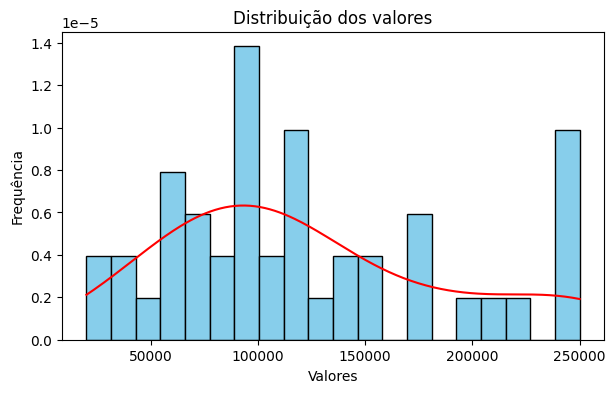

Quantidade de outliers: 0 Limite inferior: -55625.0 Limite superior: 281375.0


In [71]:
# Calcular os quartis e o intervalo interquartil (IQR)
Q1 = dados["valor_R$"].quantile(0.25)
Q3 = dados["valor_R$"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo dos limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dados[(dados["valor_R$"] < limite_inferior) | (dados["valor_R$"] > limite_superior)]

# --- Histograma de Tarifa ---

# Remover valores nulos
x_histograma = dados["valor_R$"].dropna()
# Criar histograma
plt.figure(figsize=(7,4))
plt.hist(x_histograma, bins = 20, color = "skyblue", edgecolor="black", density = True)
# Calcular curva KDE (gaussiana)
kde = gaussian_kde(x_histograma)
x_histograma_kde = np.linspace(x_histograma.min(), x_histograma.max(), 200)
# Plotar KDE sobre o histograma
plt.plot(x_histograma_kde, kde(x_histograma_kde), color="red")
# Configurar rótulos
plt.title("Distribuição dos valores")
plt.xlabel("Valores")
plt.ylabel("Frequência")
#plt.xlim(0, 100) # Para visualizar valores abaixo, diminuir o máximo do eixo x
# Plotar
plt.show()

print("Quantidade de outliers:", len(outliers), "Limite inferior:", limite_inferior, "Limite superior:", limite_superior)



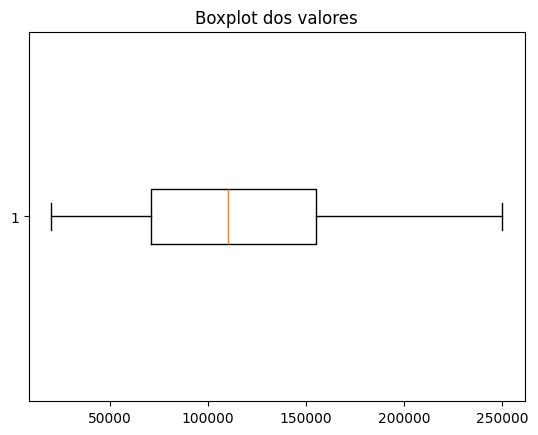

In [72]:
# Boxplot
x_boxplot = dados["valor_R$"]
plt.figure()
plt.boxplot(x_boxplot, vert=False, showfliers=True)
plt.title("Boxplot dos valores")
#plt.xlim(0, 300)
plt.show()

Item E) Verifique o tipo de relação linear que existe entre os atributos: conservação, idade_real, dormitório e valor_R$ e comente os resultados obtidos.

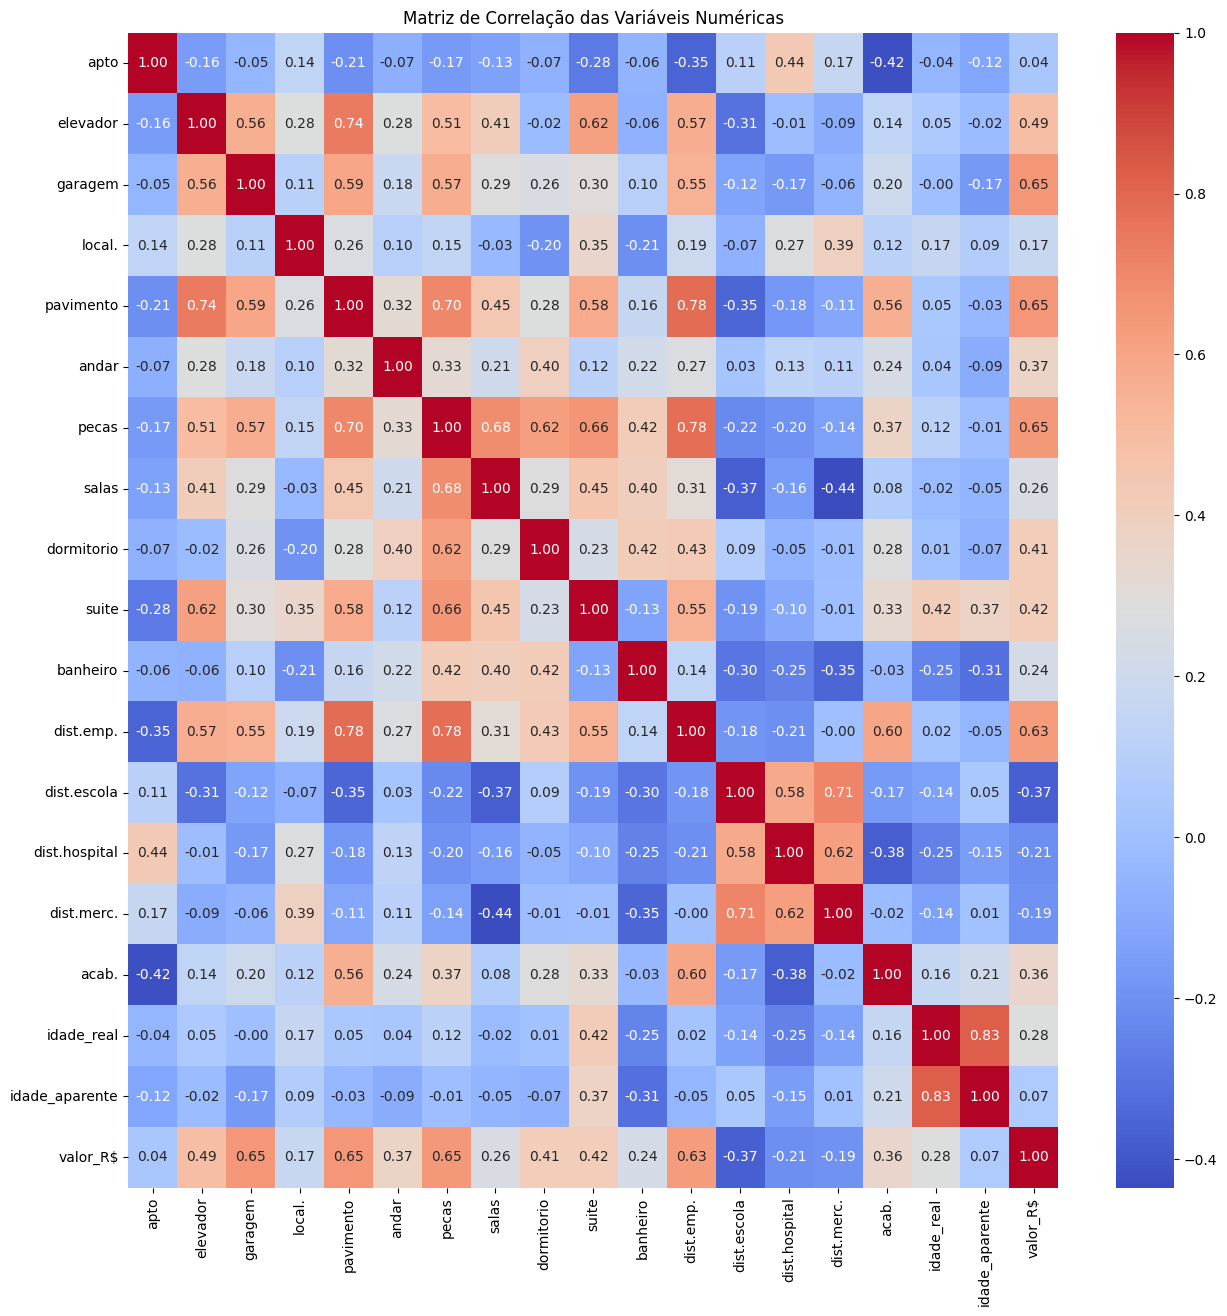

In [87]:
# Selecionar apenas colunas numéricas
numericas = dados.select_dtypes(include=["number"])
# OBS: numericas = dados.select_dtypes(include=["int64", "float64"]) poderia ser usado, mas
# como não sabemos se existem só int64 e float64, vamos considerar tudo que for número

# Calcular matriz de correlação de Pearson
matriz_corr = numericas.corr(method="pearson")

# Correlação específica entre Age e Fare
# corr = matriz_corr.loc["conservacao", "idade_real", "dormitorio", "valor_R$"]

# Plotar mapa de calor
plt.figure(figsize=(15, 15))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

A análise mostra que há correlação positiva entre os atributos e o valor do imóvel. A conservação apresenta relação moderada, indicando que imóveis em melhor estado tendem a valer mais. Além disso, o número de dormitórios também tem correlação moderada, mostrando que imóveis maiores costumam ser mais caros. Já a idade_real tem correlação fraca, sugerindo que a idade do prédio influencia pouco no preço.

Portanto, as três variáveis têm correlação positiva com o valor do imóvel, sendo a conservação e o número de dormitórios os fatores mais relevantes.
Desse modo, conclui-se que o preço de um apartamento é mais sensível à sua condição física e ao seu porte do que à sua idade real.

---
### Questão 2. (valor 2.0)

Considere a base de dados sobre informações de casas: casas.csv e faça sua leitura.

a) Calcule os 3 quartis e faça a interpretação desses valores para o atributo: **area_const**.

b) Considere os atributos: garagem, suite e edícula. Analise esses atributos e comente os resultados.

c) Aplicar a transformação de normalização nos atributos:**area_const**, **area_terreno**.

d) Podemos afirmar que mais que 50% das casas possuem área livre (sem construção) maior que 15% da área do terreno? Justifique sua resposta.


In [91]:
# Carregar arquivo CSV
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P1/base-dados-p1-scc0275-CASAS.csv")

# Exibir as cinco primeiras linhas
dados.head(5)

,casa,bairro,garagem,suite,banheiro,edicula,dist.mercado,area_const.,area_terreno,acab.,cobertura,estrutura,conserv.,piscina,dormitorio,dep.emp.,lav.,pecas,idade_aparente,valor_RS
0,1,5,1,1,2,1,3,183,500,1,4.0,3,1,0,2,1.0,1,8,2,120000
1,2,4,1,1,3,0,2,216,977,1,4.0,3,1,0,3,1.0,1,13,2,160000
2,3,4,1,1,3,0,2,155,420,2,4.0,3,1,0,3,1.0,1,12,2,110000
3,4,2,1,1,2,0,1,170,490,2,4.0,3,1,0,2,0.0,1,7,3,70000
4,5,4,1,1,2,1,1,160,480,2,4.0,3,3,0,2,0.0,1,9,3,85000


Agora vamos para os itens

Item A)

In [94]:
# Calcular os quartis
Q1 = dados["area_const."].quantile(0.25)
Q2 = dados["area_const."].quantile(0.50)
Q3 = dados["area_const."].quantile(0.75)

print(Q1)
print(Q2)
print(Q3)

111.5
155.0
199.0


Os três quartis indicam como os valores de área construída (area_const) estão distribuídos no conjunto de dados:

1º quartil (Q1 = 111,5 m²): ou seja 25% das casas possuem área construída menor que 111,5 m².

2º quartil (Q2 = 155,0 m²): isto é, 50% das casas têm área construída até 155 m² — é o valor mediano.

3º quartil (Q3 = 199,0 m²): ou seja, 75% das casas possuem área construída até 199 m².

Item B)

In [101]:
coluna_dados = ["garagem", "suite", "edicula"]

# criando as tabelas
tabela_desc = pd.DataFrame({
    "Média": dados[coluna_dados].mean(),
    "Moda": dados[coluna_dados].mode().iloc[0],
    "Mediana": dados[coluna_dados].median(),
    "Desvio Padrão": dados[coluna_dados].std(),
    "Mínimo": dados[coluna_dados].min(),
    "Máximo": dados[coluna_dados].max(), # Added missing comma here
    "Variância": dados[coluna_dados].var() # Removed duplicate "Desvio Padrão"
})

tabela_desc

,Média,Moda,Mediana,Desvio Padrão,Mínimo,Máximo,Variância
garagem,0.882353,1,1.0,0.325396,0,1,0.105882
suite,0.568627,1,1.0,0.500196,0,1,0.250196
edicula,0.313725,0,0.0,0.468623,0,1,0.219608


In [98]:
# OUTRA MANEIRA DE FAZER A Análise descritiva dos atributos garagem, suite e edícula
desc_categoricos = dados[["garagem", "suite", "edicula"]].describe(include="all")

desc_categoricos

,garagem,suite,edicula
count,51.000000,51.000000,51.000000
mean,0.882353,0.568627,0.313725
std,0.325396,0.500196,0.468623
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


Os três atributos, isto é, garagem, suíte e edícula, são variáveis binárias (sendo 0 = não possui, 1 = possui). Pelas descrições estatísticas, temos que a análise mostra o seguinte:

A variável garagem apresenta média de 0,88, indicando que a grande maioria das casas possui garagem, sendo um item praticamente padrão.

A variável suíte, com média de 0,57, revela que pouco mais da metade das casas possuem suíte, mostrando uma característica comum, mas não universal.

Já edícula, com média de 0,31, é menos frequente, sugerindo que apenas cerca de um terço das casas possuem essa estrutura adicional.

De forma resumida, o conjunto mostra um padrão de moradias onde garagem é predominante, suíte é moderadamente comum e edícula é mais rara.

Item C)

In [106]:
# Normalização (Min-Max) dos atributos area_const e area_terreno
scaler = MinMaxScaler()
dados[["area_const_norm", "area_terreno_norm"]] = scaler.fit_transform(
    dados[["area_const.", "area_terreno"]]
)

Item D)

In [109]:
# Verificar se mais que 50% das casas têm área livre > 15% do terreno
dados["area_livre_%"] = (dados["area_terreno"] - dados["area_const."]) / dados["area_terreno"] * 100
proporcao_maior_15 = (dados["area_livre_%"] > 15).mean() * 100

{
    "Q1": Q1,
    "Q2": Q2,
    "Q3": Q3,
    "Resumo_categoricos": desc_categoricos.to_dict(),
    "Proporcao_area_livre_maior_15%": proporcao_maior_15
}

{'Q1': np.float64(111.5),
 'Q2': np.float64(155.0),
 'Q3': np.float64(199.0),
 'Resumo_categoricos': {'garagem': {'count': 51.0,
   'mean': 0.8823529411764706,
   'std': 0.32539568672798447,
   'min': 0.0,
   '25%': 1.0,
   '50%': 1.0,
   '75%': 1.0,
   'max': 1.0},
  'suite': {'count': 51.0,
   'mean': 0.5686274509803921,
   'std': 0.5001960399996912,
   'min': 0.0,
   '25%': 0.0,
   '50%': 1.0,
   '75%': 1.0,
   'max': 1.0},
  'edicula': {'count': 51.0,
   'mean': 0.3137254901960784,
   'std': 0.46862334890320473,
   'min': 0.0,
   '25%': 0.0,
   '50%': 0.0,
   '75%': 1.0,
   'max': 1.0}},
 'Proporcao_area_livre_maior_15%': np.float64(98.0392156862745)}

Sim. Aproximadamente 98% das casas possuem área livre superior a 15% da área total do terreno.
Isso significa que a grande maioria das propriedades tem uma parte significativa do terreno não construída, o que indica presença de quintais, jardins ou áreas de lazer externas, por exemplo.

---
### Questão 3. (valor 3.0)

Considere o dataset "terrenos.csv" e faça sua leitura. O objetivo desse dataset é determinar o valor estimado de um terreno a partir de 10 atributos.

a) Calcule os quatro momentos estatísticos para os atributos `area_terreno` e `Valor_R$`.

b) Mostre graficamente a obliquidade observada e comente sobre o tipo de obliquidade que esses atributos apresentam.

c) os atributos `area_terreno` e `Valor_R$` possuem "outliers"? Se sim, quais são os valores exatos considerando 2 casas decimais?


In [110]:
# Primeiro, faremos a leitura do arquivo excel

# Carregar arquivo Excel
dados = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/P1/base-dados-p1-scc0275-TERRENOS_modificado.xlsx")

# Exibir as cinco primeiras linhas
display(dados.head())

,terreno,localizacao,setor_comercial,polo,frente,area_terreno,protecao,plano,inclinado,posicao,pavimentacao,valor_RS
0,1,6,2,yes,2,650,3,0,yes,1,yes,100000
1,2,2,0,no,3,640,3,1,no,2,yes,25000
2,3,5,0,yes,1,500,3,1,no,1,yes,43000
3,4,3,0,yes,2,390,3,2,no,1,yes,33000
4,5,5,0,yes,3,262,3,2,no,2,yes,40000


Item A)

In [115]:
# Calcular os quatro momentos estatísticos para area_terreno e valor_RS
momentos = {}
for col in ["area_terreno", "valor_RS"]:
    media = dados[col].mean()
    variancia = dados[col].var()
    assimetria = skew(dados[col])
    curtose = kurtosis(dados[col])
    momentos[col] = {
        "Média": round(media, 2),
        "Variância": round(variancia, 2),
        "Assimetria": round(assimetria, 2),
        "Curtose": round(curtose, 2)
    }

momentos_dados = pd.DataFrame(momentos).T
momentos_dados

,Média,Variância,Assimetria,Curtose
area_terreno,607.54,1.470244e+05,2.15,5.21
valor_RS,74458.33,5.242259e+09,1.90,3.03


Item B)

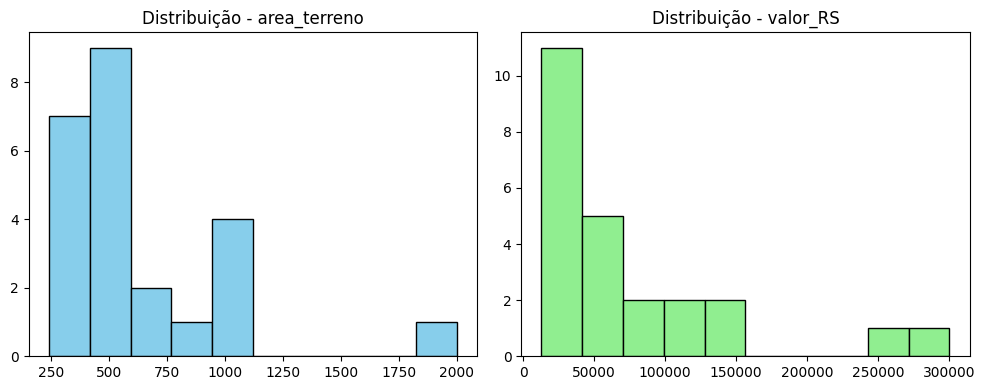

In [126]:
# Verificar obliquidade (assimetria) graficamente com histograma
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(dados["area_terreno"], bins=10, color="skyblue", edgecolor="black")
plt.title("Distribuição - area_terreno")

plt.subplot(1, 2, 2)
plt.hist(dados["valor_RS"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Distribuição - valor_RS")

plt.tight_layout()
plt.show()

Os histogramas nos revelam que tanto area_terreno quanto valor_R$ apresentam obliquidade positiva.

Isso significa que a maioria dos terrenos possui áreas e valores menores, enquanto há poucos terrenos com valores muito altos, que formam a cauda alongada à direita. Normalmente, terrenos mais caros é menos comum mesmo na vida real, contudo aumentam a média geral do conjunto.

Item C)

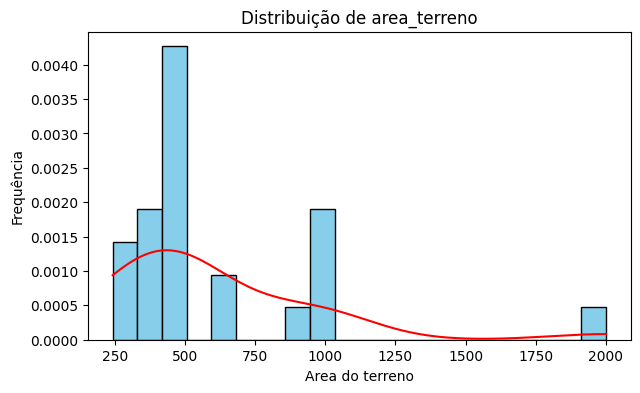

Quantidade de outliers: 1 Limite inferior: -133.75 Limite superior: 1236.25


In [117]:
# Calcular os quartis e o intervalo interquartil (IQR)
Q1 = dados["area_terreno"].quantile(0.25)
Q3 = dados["area_terreno"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo dos limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dados[(dados["area_terreno"] < limite_inferior) | (dados["area_terreno"] > limite_superior)]

# --- Histograma de Tarifa ---

# Remover valores nulos
x_histograma = dados["area_terreno"].dropna()
# Criar histograma
plt.figure(figsize=(7,4))
plt.hist(x_histograma, bins = 20, color = "skyblue", edgecolor="black", density = True)
# Calcular curva KDE (gaussiana)
kde = gaussian_kde(x_histograma)
x_histograma_kde = np.linspace(x_histograma.min(), x_histograma.max(), 200)
# Plotar KDE sobre o histograma
plt.plot(x_histograma_kde, kde(x_histograma_kde), color="red")
# Configurar rótulos
plt.title("Distribuição de area_terreno")
plt.xlabel("Area do terreno")
plt.ylabel("Frequência")
#plt.xlim(0, 100) # Para visualizar valores abaixo, diminuir o máximo do eixo x
# Plotar
plt.show()

print("Quantidade de outliers:", len(outliers), "Limite inferior:", limite_inferior, "Limite superior:", limite_superior)


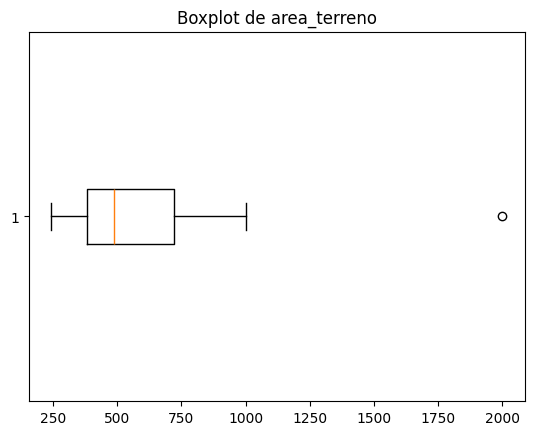

In [118]:
# Boxplot
x_boxplot = dados["area_terreno"]
plt.figure()
plt.boxplot(x_boxplot, vert=False, showfliers=True)
plt.title("Boxplot de area_terreno")
#plt.xlim(0, 300)
plt.show()

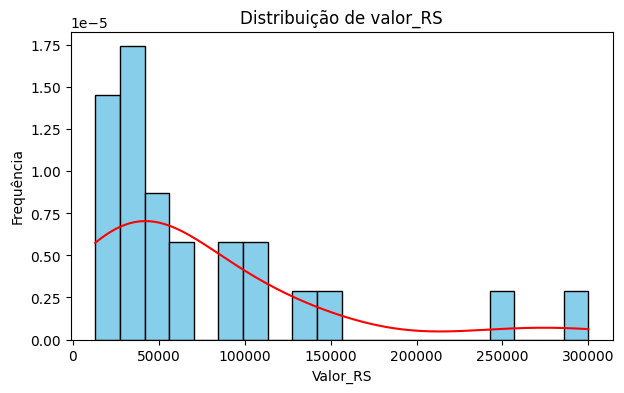

Quantidade de outliers: 2 Limite inferior: -63750.0 Limite superior: 186250.0


In [119]:
# Calcular os quartis e o intervalo interquartil (IQR)
Q1 = dados["valor_RS"].quantile(0.25)
Q3 = dados["valor_RS"].quantile(0.75)
IQR = Q3 - Q1

# Cálculo dos limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers = dados[(dados["valor_RS"] < limite_inferior) | (dados["valor_RS"] > limite_superior)]

# --- Histograma de Tarifa ---

# Remover valores nulos
x_histograma = dados["valor_RS"].dropna()
# Criar histograma
plt.figure(figsize=(7,4))
plt.hist(x_histograma, bins = 20, color = "skyblue", edgecolor="black", density = True)
# Calcular curva KDE (gaussiana)
kde = gaussian_kde(x_histograma)
x_histograma_kde = np.linspace(x_histograma.min(), x_histograma.max(), 200)
# Plotar KDE sobre o histograma
plt.plot(x_histograma_kde, kde(x_histograma_kde), color="red")
# Configurar rótulos
plt.title("Distribuição de valor_RS")
plt.xlabel("Valor_RS")
plt.ylabel("Frequência")
#plt.xlim(0, 100) # Para visualizar valores abaixo, diminuir o máximo do eixo x
# Plotar
plt.show()

print("Quantidade de outliers:", len(outliers), "Limite inferior:", limite_inferior, "Limite superior:", limite_superior)

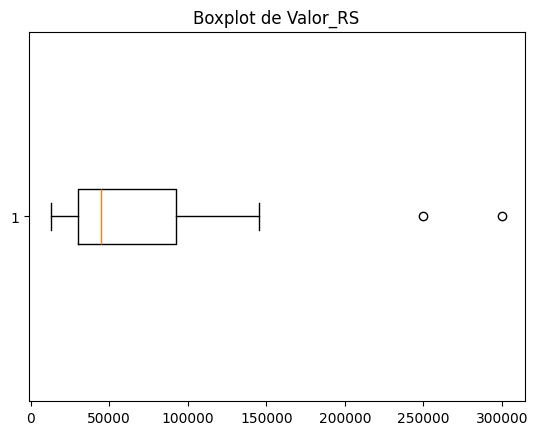

In [121]:
# Boxplot
x_boxplot = dados["valor_RS"]
plt.figure()
plt.boxplot(x_boxplot, vert=False, showfliers=True)
plt.title("Boxplot de Valor_RS")
#plt.xlim(0, 300)
plt.show()

Considerando as quantidades, temos que em area_terreno o valor é de 2000 e em valor_R$ os outliers possuem valores de 250000 e 300000

---
### Questão 4. (valor 2.5)

a) Faça a leitura do arquivo: 'bank-additional-full.csv' e comente sobre os tipos de dados presentes neste arquivo.

b) Calcule a matriz de correlação e verifique se é possível descartar algumas variáveis (valor de correlação > 0.5 em módulo).

c) Verifique se o atributo "y" possui classes desbanlanceadas. Justifique.

d) Realizar as operações de transformação adequadas na base de dados obtida
no __item b__.

e) Fazer o balanceamento das classes, utilizando a técnica SMOTE com k=3. Após isso, exiba o número de elementos de cada classe.

Item A)

In [133]:
# Carregar arquivo CSV
dados = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/P1/bank-additional-full.csv")

# Exibir as cinco primeiras linhas
dados.head(5)

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


Os dados misturam variáveis socioeconômicas (como idade, profissão, escolaridade, status de crédito) e macroeconômicas (como taxa de emprego e taxa de juros).

In [130]:
# Identificar tipos de dados
tipos_dados = dados.dtypes.value_counts()
tipos_dados

,count
object,1


Item B)

In [141]:
# Selecionar apenas colunas numéricas
numericas = dados.select_dtypes(include=["number"])
# OBS: numericas = dados.select_dtypes(include=["int64", "float64"]) poderia ser usado, mas
# como não sabemos se existem só int64 e float64, vamos considerar tudo que for número

# Calcular matriz de correlação de Pearson
matriz_corr = numericas.corr(method="pearson")

# Plotar mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação das Variáveis Numéricas")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 800x600 with 0 Axes>

Item C)

In [143]:
# Verificar se o atributo "y" é desbalanceado
distrib_y = dados["y"].value_counts(normalize=True) * 100

KeyError: 'y'

Acabou o tempo

Item E) Fazer o balanceamento das classes, utilizando a técnica SMOTE com k=3. Após isso, exiba o número de elementos de cada classe.

In [145]:
contagem = dados.value_counts()
porcentagem = dados.value_counts(normalize=True) * 100

print("Contagem:\n", contagem)
print("\nPorcentagem:\n", porcentagem.round(2))

# Visualização
sns.countplot(x="Survived", data=dados, palette="coolwarm")
plt.title("Distribuição da variável Survived")
plt.xlabel("Sobrevivente (0 = Não, 1 = Sim)")
plt.ylabel("Número de passageiros")
plt.show()


Contagem:
 age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
41;"technician";"married";"professional.course";"no";"yes";"no";"cellular";"aug";"tue";127;1;999;0;"nonexistent";1.4;93.444;-36.1;4.966;5228.1;"no"                                                                             2
24;"services";"single";"high.school";"no";"yes";"no";"cellular";"apr";"tue";114;1;999;0;"nonexistent";-1.8;93.075;-47.1;1.423;5099.1;"no"                                                                                       2
27;"technician";"single";"professional.course";"no";"no";"no";"cellular";"jul";"mon";331;2;999;0;"nonexistent";1.4;93.918;-42.7;4.962;5228.1;"no"                                                                               2
71;"retired";"single";"university.degree";"no";"no";"no";"telephone";"oct";"tue";120;1;999

ValueError: Could not interpret value `Survived` for `x`. An entry with this name does not appear in `data`.

In [ ]:
# Separar features e rótulo
X = dados.drop(columns=["Survived", "Name", "Ticket", "Cabin"], errors="ignore")
y = dados["Survived"]
X = X.select_dtypes(include=["number"])

# Dividir em treino e teste (com estratificação para manter proporção original)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Aplicar SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# Contagens originais e balanceadas
original = y_train.value_counts().rename({0: "Não sobreviveu", 1: "Sobreviveu"})
balanceado = y_train_bal.value_counts().rename({0: "Não sobreviveu", 1: "Sobreviveu"})

# Criar DataFrame para o gráfico
df_comparacao = pd.DataFrame({
    "Original": original,
    "Balanceado": balanceado
})

# Plotar gráfico lado a lado
df_comparacao.plot(kind="bar", figsize=(6,4), color=["salmon", "mediumseagreen"], edgecolor="black")
plt.title("Comparação da Distribuição das Classes Antes e Depois do Balanceamento (SMOTE)")
plt.ylabel("Número de passageiros")
plt.xlabel("Classe - Sobrevivência")
plt.xticks(rotation=0)
plt.legend(title="Conjunto de dados")
plt.tight_layout()
plt.show()